<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Advance_Regression/02-02-02-poisson-regression-standard-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 2. Standard Poisson Regression




## Introdduction

Poisson Regression** is a type of Generalized Linear Model (GLM) used for modeling count data. Standard Poisson Regression Model considers only the number of events and does not take into account any additional exposure or observation time.

It is particularly useful when the dependent variable represents the number of occurrences of an event over a fixed period of time, space, or some other exposure, and the data exhibit a Poisson distribution. **Standard Poisson Regression Model** considers only the number of events and does not take into account any additional exposure or observation time.

**Key characteristics  of Poisson Regression**:

1.  ***Count Data***: The response variable $Y$ is a non-negative integer representing counts (0, 1, 2, …).

2.  ***Poisson Distribution***: The response variable $Y$ follows a Poisson distribution with parameter $\lambda$ where $\lambda$ is the expected count. The Poisson distribution assumes that the mean and variance of the response variable are equal.

$$ Y_i \sim \text{Poisson}(\lambda_i) $$

3.  ***Log Link Function***: The model uses a **logarithmic link function** to relate the linear predictor to the Poisson mean, $\lambda$, which ensures that the expected value $\lambda$ is positive.

$$ \log(\lambda_i) = X_i \beta $$

       
Where:

-   $\lambda_i$ = $E(Y_i | X)$ is the expected count for the $i^{th}$ observation.
-   $X_i$ is the vector of predictor variables for the $i^{th}$ observation.
-   $\beta$ is the vector of coefficients to be estimated.


**Model Formulation**:

The Poisson regression model assumes that the log of the expected count (rate) of the dependent variable (Y) is a linear combination of the predictor variables $X_1, X_2, \dots, X_p$. The model can be written as:

$$ \log(\lambda_i) = \beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i} + \dots + \beta_p X_{pi} $$

This can be rewritten as:

$$ \lambda_i = \exp(\beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i} + \dots + \beta_p X_{pi}) $$

Here: - $\lambda_i$ is the expected count (mean) of the dependent variable for the $(i^{th}$ observation. - $\beta_0$ is the intercept. - $\beta_1, \dots, \beta_p$ are the regression coefficients that quantify the effect of the predictor variables on the expected count.

**Interpretation of Coefficients**:

-   ***Intercept*** $\beta_0$: The log of the expected count when all predictors are zero.

-   ***Predictor Coefficients*** $\beta_1, \beta_2, \dots$: A one-unit increase in a predictor $X_j$ is associated with a multiplicative effect on the expected count, given by $e^{\beta_j}$. For example:

$$ e^{\beta_j} = \frac{\lambda_i(\text{new value of } X_j)}{\lambda_i(\text{old value of } X_j)} $$

This indicates the factor by which the expected count $\lambda_i$ changes for a one-unit increase in (X_j), holding other variables constant.

**Poisson Probability Mass Function (PMF)**:

The probability mass function of the Poisson distribution is given by:

$$ P(Y = y) = \frac{\lambda^y e^{-\lambda}}{y!}, \quad y = 0, 1, 2, \dots $$

Where $\lambda$ is the mean count (expected value) and $y$ is the observed count.

**Interpretation of Results**:

-   The `coefficients` from the model will indicate how a one-unit change in the predictor (e.g., age or income) affects the log of the expected count of accidents.
-   The **exponentiated coefficients** (`exp(coef)`) can be interpreted as the **multiplicative change** in the expected number of accidents for a one-unit increase in the predictor.

**Model Assumptions**:

1.  ***Mean-Variance Equality***: The Poisson model assumes that the mean and variance of the response variable are equal. If the data exhibit **overdispersion** (variance greater than the mean), the standard Poisson model may not be appropriate, and you may need to use an alternative like the **Negative Binomial regression**.
2.  ***Independence of Observations***: The counts for each observation are assumed to be independent.
3.  **Linearity on Log Scale**: The log of the expected count is assumed to be a linear function of the predictor variables.

This model is widely used for count data where the occurrence of events is rare and spread over time or space, such as disease incidence, traffic accidents, or insurance claims.


## Install rpy2 some important packages

In [ ]:
!sudo apt install cmake
!sudo apt install libcairo2-dev
!sudo apt install libgmp-dev
!sudo apt-get install libmpfr-dev

In [ ]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.4.2
Uninstalling rpy2-3.4.2:
  Successfully uninstalled rpy2-3.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=314953 sha256=5f30ed5b009ef8975cd81de98a8316a074a4e332bb8c025b6fd46cfb8e5c2495
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2


## Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Check and install required R packages

In [ ]:
%%R
pkg <- c('tidyverse',
     'plyr',
		 'gt',
		 'DataExplorer',
		 'rstatix',
		 'gtsummary',
		 'report',
		 'performance',
		 'jtools',
		 'margins',
		 'marginaleffects',
		 'ggeffects',
		 'patchwork',
		 'Metrics',
		 'ggpmisc',
		 'metrica',
		 'RColorBrewer',
		 'MASS',
		 'epiDisplay',
		 'sandwitch'
		  )
new.packages <- pkg[!(pkg %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')


In [ ]:
%%R
install.packages(c("nloptr", "lme4", "jomo", "mitml", 'mice'),lib='drive/My Drive/R/')
devtools::install_github("choonghyunryu/dlookr", lib='drive/My Drive/R/')

## Standard Poisson regression model

Here's how we can fit a standard Poisson regression model manually in R using count data. Let's assume your dataset contains a response variable `y` (count data) and four predictor variables $X_1, X_2, \dots, X_4$.

### Create datset

In [ ]:
%%R
# Set seed for reproducibility
set.seed(123)

# Generate sample data with 4 predictors
n <- 100
x1 <- rnorm(n)
x2 <- rnorm(n)
x3 <- rnorm(n)
x4 <- rnorm(n)

# True coefficients
beta0_true <- 0.5
beta1_true <- 0.3
beta2_true <- -0.2
beta3_true <- 0.4
beta4_true <- 0.1

# Calculate lambda (mean of the Poisson) for each observation
lambda <- exp(beta0_true + beta1_true * x1 + beta2_true * x2 + beta3_true * x3 + beta4_true * x4)

# Generate response variable y as count data
y <- rpois(n, lambda)

# Combine into a data frame
data <- data.frame(y, x1, x2, x3, x4)
head(data)

  y          x1          x2         x3         x4
1 3 -0.56047565 -0.71040656  2.1988103 -0.7152422
2 2 -0.23017749  0.25688371  1.3124130 -0.7526890
3 1  1.55870831 -0.24669188 -0.2651451 -0.9385387
4 0  0.07050839 -0.34754260  0.5431941 -1.0525133
5 1  0.12928774 -0.95161857 -0.4143399 -0.4371595
6 6  1.71506499 -0.04502772 -0.4762469  0.3311792


### Specify the Poisson Model

The Poisson model for count data assumes that the mean of `y`, given `$X_1, X_2, \dots, X_4$`, follows a log-linear relationship:

$$ \log(\lambda_i) = \beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i} + \dots + \beta_p X_{pi} $$

Or equivalently:

$$ \lambda_i = \exp(\beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i} + \dots + \beta_p X_{pi}) $$

In R, you can write the log-likelihood function as follows:

In [ ]:
%%R
# Log-likelihood function for Poisson regression with 4 predictors
poisson_log_likelihood <- function(params) {
  beta0 <- params[1]
  beta1 <- params[2]
  beta2 <- params[3]
  beta3 <- params[4]
  beta4 <- params[5]

  lambda <- exp(beta0 + beta1 * data$x1 + beta2 * data$x2 + beta3 * data$x3 + beta4 * data$x4)
  log_likelihood <- sum(dpois(data$y, lambda, log = TRUE))

  return(-log_likelihood)  # Return negative log-likelihood for minimization
}

### Optimize the Parameters

Use the `optim()` function to maximize the log-likelihood and obtain parameter. It is a eneral-purpose optimization based on Nelder–Mead, quasi-Newton and conjugate-gradient algorithms. It includes an option for box-constrained optimization and simulated annealing.

In [ ]:
%%R
# Initial guesses for beta0 to beta4
initial_params <- c(0, 0, 0, 0, 0)

# Use optim to find MLE for the parameters
fit <- optim(par = initial_params, # Initial values for the parameters to be optimized over.
             fn = poisson_log_likelihood,
             hessian = TRUE) #  Should a numerically differentiated Hessian matrix be returned

# Extract parameter estimates
params_hat <- fit$par
cat("Estimated coefficients:", params_hat, "\n")

Estimated coefficients: 0.5198836 0.2086972 -0.2169469 0.3623886 0.1848185 


### Calculate Standard Errors, Z-scores, and P-values

With the hessian argument in `optim()`, we can estimate the covariance matrix for the parameter estimates by inverting the Hessian matrix. Standard errors are the square root of the diagonal elements of the covariance matrix.


In [ ]:
%%R
# Invert the Hessian matrix to get the covariance matrix
cov_matrix <- solve(fit$hessian)

# Standard errors
std_errors <- sqrt(diag(cov_matrix))

# Z-scores
z_scores <- params_hat / std_errors

# P-values (2-sided)
p_values <- 2 * (1 - pnorm(abs(z_scores)))

# Create summary statistics table
summary_table <- data.frame(
  Estimate = params_hat,
  Std.Error = std_errors,
  Z.value = z_scores,
  P.value = p_values
)
# Set row names as parameter names
rownames(summary_table) <- c("Intercept", "x1", "x2", "x3", "x4")

# Display summary table
print(summary_table)

            Estimate  Std.Error   Z.value      P.value
Intercept  0.5198836 0.08395270  6.192577 5.918832e-10
x1         0.2086972 0.07531222  2.771094 5.586837e-03
x2        -0.2169469 0.07911883 -2.742038 6.105919e-03
x3         0.3623886 0.07241511  5.004323 5.605859e-07
x4         0.1848185 0.07097185  2.604110 9.211316e-03


### Compare with `glm()` for verification

In [ ]:
%%R
# Fit Poisson model using glm
glm_fit <- glm(y ~ x1 + x2 + x3 + x4, family = poisson, data = data)

# Display glm results summary
summary(glm_fit)


Call:
glm(formula = y ~ x1 + x2 + x3 + x4, family = poisson, data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.52002    0.08395   6.195 5.85e-10 ***
x1           0.20879    0.07531   2.773  0.00556 ** 
x2          -0.21699    0.07912  -2.743  0.00609 ** 
x3           0.36233    0.07241   5.004 5.62e-07 ***
x4           0.18476    0.07097   2.603  0.00923 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 144.73  on 99  degrees of freedom
Residual deviance: 106.14  on 95  degrees of freedom
AIC: 334.3

Number of Fisher Scoring iterations: 5



This manual approach should yield parameter estimates that are very close to those obtained by `glm()`, as both methods maximize the same likelihood function.

## Standard Poisson model with R

In this exercise we will develop a standard Poisson model in R with a built function `glm() `to explain the variability the total diagnosed diabetes per county (count data) in the USA.

### Load packages

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
library(tidyverse)
library(plyr)
library(gt)
library(rstatix)
library(gtsummary)
library(DataExplorer)
library(report)
library(performance)
library(jtools)
library(margins)
library(marginaleffects)
library(ggeffects)
library(patchwork)
library(Metrics)
library(ggpmisc)
library(RColorBrewer)
library(MASS)
library(epiDisplay)
library(dlookr)
library(sandwich)

### Data

The County-level age-adjusted number and rate of diabetes patients, prevalence of obesity, physical inactivity and [Food environment index](https://www.ers.usda.gov/data-products/food-environment-atlas.aspx) for the year 2016-2020 were obtained from United States [Diabetes Surveillance System (USDSS)](https://gis.cdc.gov/grasp/diabetes/diabetesatlas-surveillance.html).

![alt text](http://drive.google.com/uc?export=view&id=1pNL0FF71fPQqfSffEMjHuIdGdiZdYVDs)

Full data set is available for download from my [Dropbox](https://www.dropbox.com/scl/fi/ynrinqzj58f3x5mvc96as/county_data_2016_2020.csv?rlkey=zpy7qxrh6r4l01ct4hjxgcnds&dl=0) or from my [Github](https://github.com/zia207/r-colab/tree/main/Data/Regression_analysis) accounts.



Dataset contains five years average (2016-2020) of following variables :

1.  `Diabetes_count` -  Diabetes number per county ([Diabetes Surveillance System (USDSS))](https://gis.cdc.gov/grasp/diabetes/diabetesatlas-surveillance.html)

2.  `Diabetes_per` - Diabetes number per county [(Diabetes Surveillance System (USDSS))](https://gis.cdc.gov/grasp/diabetes/diabetesatlas-surveillance.html)

3. `Urban_Rural` - Urban Rural County (USDA)

4. `PPO_total` - Total population per  county (US Census)

5. `Obesity` - % obesity per county [(Behavioral Risk Factor Surveillance System)](https://www.cdc.gov/brfss/)  

6. `Physical_Inactivity`: % adult access to exercise opportunities ([County Health Ranking](https://www.countyhealthrankings.org/health-data/methodology-and-sources/data-documentation))

7. `SVI` - Level of social vulnerability in the county relative to other counties in the nation or within the state.ocial vulnerability refers to the potential negative effects on communities caused by external stresses on human health. The CDC/ATSDR Social vulnerability Index (SVI) ranks all US counties on 15 social factors, including poverty, lack of vehicle access, and crowded housing, and groups them into four related themes. ( [CDC/ATSDR Social Vulnerability Index (SVI)](https://www.atsdr.cdc.gov/placeandhealth/svi/interactive_map.html))

8. `Food_Env_Index`: Measure of access to healthy food. The Food Environment Index ranges from a scale of 0 (worst) to 10 (best) and equally weights two indicators: 1) Limited access to healthy foods based on distance an individual lives from a grocery store or supermarket, locations for healthy food purchases in most communities; and 2) Food insecurity defined as the inability to access healthy food because of cost barriers.[County Health Ranking](https://www.countyhealthrankings.org/health-data/methodology-and-sources/data-documentation)                                                                                                                                                                                                                                                    

We will use `read_csv()` function of **readr** package to import data as a **tidy** data.

In [ ]:
%%R
mf<-read_csv("https://github.com/zia207/r-colab/raw/main/Data/Regression_analysis/county_data_2016_2020.csv")
# select variables
df<-mf |>
  dplyr::select(Diabetes_count,
                Obesity,
                Physical_Inactivity,
                Access_Excercise,
                Food_Env_Index,
                SVI,
                Urban_Rural
                ) |>
  glimpse()
# data processing
df$Diabetes_count<-as.integer(df$Diabetes_count)
df$Urban_Rural<-as.factor(df$Urban_Rural)

Rows: 3107 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): State, County, Urban_Rural
dbl (12): FIPS, X, Y, POP_Total, Diabetes_count, Diabetes_per, Obesity, Acce...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 3,107
Columns: 7
$ Diabetes_count      <dbl> 4282, 17477, 2659, 1966, 5318, 796, 2128, 13250, 3…
$ Obesity             <dbl> 29.22, 28.94, 29.34, 29.44, 30.10, 19.86, 30.38, 3…
$ Physical_Inactivity <dbl> 26.42, 22.86, 23.72, 25.38, 24.76, 18.58, 28.66, 2…
$ Access_Excercise    <dbl> 70.8, 72.2, 49.8, 30.6, 24.6, 19.6, 48.0, 51.4, 62…
$ Food_Env_Index      <dbl> 6.9, 7.7, 5.5, 7.6, 8.1, 4.3, 6.5, 6.3, 6.4, 7.7, …
$ SVI                 <dbl> 0.5130, 0.3103, 0.9927, 0.8078, 0.5137, 0.8310, 0.…
$ Urban_Rural         <chr> "Urban", "Urban", "Rural", "Urban", "Urban", "Rura…


### Data Description

The {epidisplay} package can provide both numerical and categorical statistics simultaneously with the `codebook()` function. It's a great tool for descriptive statistics.

In [ ]:
%%R
epiDisplay::codebook(df[,1:7])


 
 
POP_total 	 : 	  

No. of observations = 2936

  Var. name obs. mean     median  s.d.      min.   max.   
1 POP_total 2936 79764.44 20938.5 258452.28 322    7916625

Diabetes 	 : 	  

No. of observations = 2936

  Var. name obs. mean   median  s.d.     min.   max.  
1 Diabetes  2936 7580.1 2171.5  23620.34 24     723811

Obesity 	 : 	  

No. of observations = 2936

  Var. name obs. mean   median  s.d.   min.   max.  
1 Obesity   2936 27.64  27.9    5.69   10.5   43.8  

Physical_inactivity 	 : 	  

No. of observations = 2936

  Var. name           obs. mean   median  s.d.   min.   max.  
1 Physical_inactivity 2936 19.4   19      4.02   9.4    34.5  

Access_exercise 	 : 	  

No. of observations = 2936

  Var. name       obs. mean   median  s.d.   min.   max.  
1 Access_exercise 2936 54.9   56.43   23.67  0      100   

Food_env_index 	 : 	  

No. of observations = 2936

  Var. name      obs. mean   median  s.d.   min.   max.  
1 Food_env_index 2936 7.46   7.6     1.12   0      10 

#### Density plot


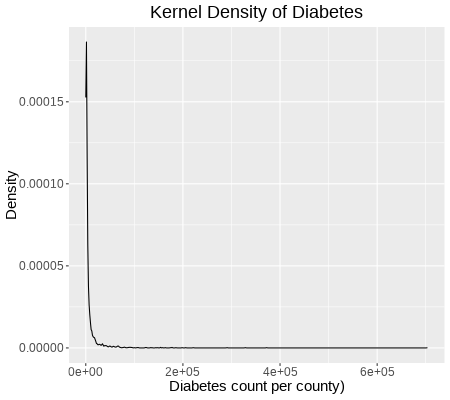

In [ ]:
%%R -w 450 -h 400 -u px
ggplot(df, aes(Diabetes_count)) +
  geom_density()+
  # x-axis title
  xlab("Diabetes count per county)") +
  # y-axis title
  ylab("Density")+
  # plot title
  ggtitle("Kernel Density of Diabetes")+
    theme(
    # Center the plot title
    plot.title = element_text(hjust = 0.5))

#### Descriptive Statistics

In [ ]:
%%R
# Standard error
SE <- function(x){
  sd(x)/sqrt(length(x))
}

# Get summary statistics
summarise_diabetes<-plyr::ddply(df,~ Urban_Rural, summarise,
                Mean= round(mean(Diabetes_count), 2),
                Median=round (median(Diabetes_count), 2),
                Min= round (min(Diabetes_count),2),
                Max= round (max(Diabetes_count),2),
                SD= round(sd(Diabetes_count), 2),
                SE= round (SE(Diabetes_count), 3))
print(summarise_diabetes)

  Urban_Rural     Mean Median Min    Max       SD      SE
1       Rural  1169.59    875  17   7367  1037.88  28.676
2       Urban 12519.33   4438  24 703508 30080.86 709.604


#### Barplot - Urban vs Rural

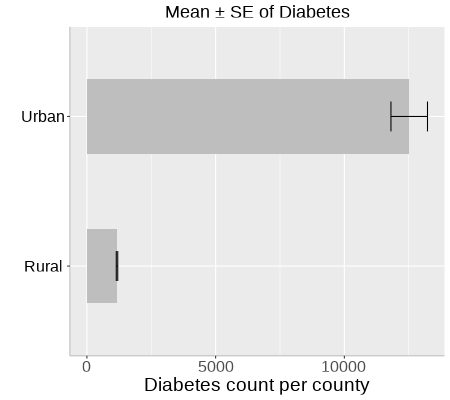

In [ ]:
%%R -w 450 -h 400 -u px

ggplot(summarise_diabetes, aes(x=Urban_Rural, y=Mean)) +
  geom_bar(stat="identity", position=position_dodge(),width=0.5, fill="gray") +
  geom_errorbar(aes(ymin=Mean-SE, ymax=Mean+SE), width=.2,
   position=position_dodge(.9))+
  # add y-axis title and x-axis title leave blank
  labs(y="Diabetes count per county", x = "")+
  # add plot title
  ggtitle("Mean ± SE of Diabetes")+
  coord_flip()+
  # customize plot themes
  theme(
        axis.line = element_line(colour = "gray"),
        # plot title position at center
        plot.title = element_text(hjust = 0.5),
        # axis title font size
        axis.title.x = element_text(size = 14),
        # X and  axis font size
        axis.text.y=element_text(size=12,vjust = 0.5, hjust=0.5, colour='black'),
        axis.text.x = element_text(size=12))

#### Correlation

`plot.correlate()` function {dlookr}  package visualizes the correlation matrix of a dataframe:

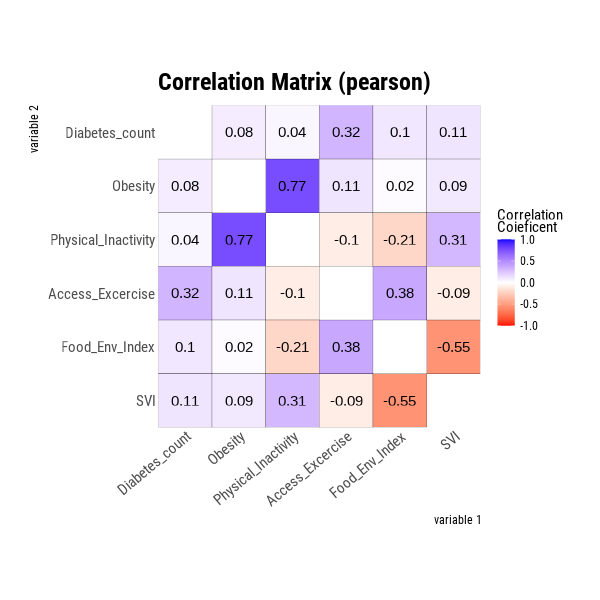

In [ ]:
%%R -w 600 -h 600 -u px

df |>
  # select variables
  dplyr::select (Diabetes_count,
                Obesity,
                Physical_Inactivity,
                Access_Excercise,
                Food_Env_Index,
                SVI

                ) |>
  dlookr::correlate() |>
  plot()

Let explore correlation in rural and urban counties:

Adding missing grouping variables: `Urban_Rural`


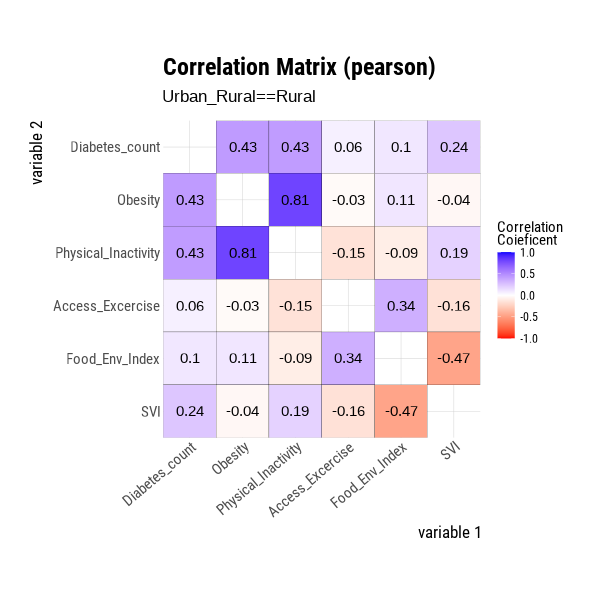

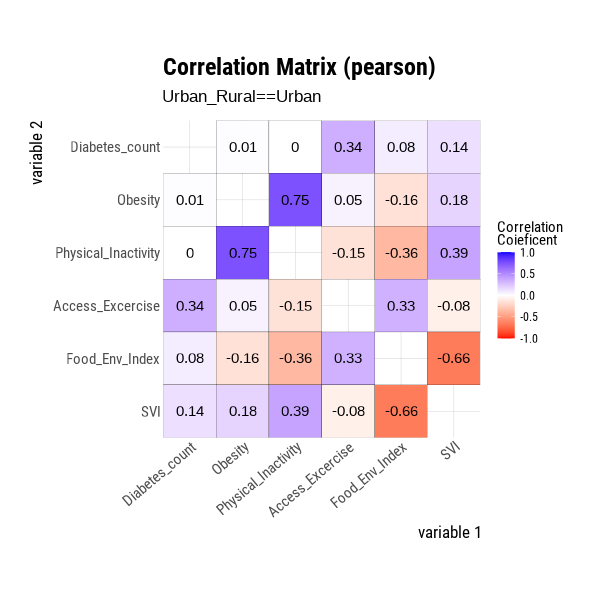

In [ ]:
%%R -w 600 -h 600 -u px

df |>
  group_by(Urban_Rural) |>
  # select variables
  dplyr::select (Diabetes_count,
                Obesity,
                Physical_Inactivity,
                Access_Excercise,
                Food_Env_Index,
                SVI) |>
  dlookr::correlate() |>
  plot()

### Split data to training and test

We will use the `ddply()` function of the **plyr** package to split soil carbon datainto homogeneous subgroups using **stratified random sampling**. This method involves dividing the population into strata and taking random samples from each stratum to ensure that each subgroup is proportionally represented in the sample. The goal is to obtain a representative sample of the population by adequately representing each stratum.

In [ ]:
%%R
seeds = 11076
tr_prop = 0.70
# training data (70% data)
train= ddply(df,.(Urban_Rural),
                 function(., seed) { set.seed(seed); .[sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] }, seed = 101)
test = ddply(df, .(Urban_Rural),
            function(., seed) { set.seed(seed); .[-sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] }, seed = 101)

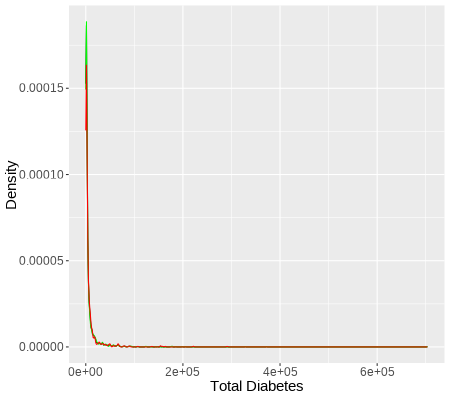

In [ ]:
%%R -w 450 -h 400 -u px
# Density plot all, train and test data
ggplot()+
  geom_density(data = df, aes(Diabetes_count))+
  geom_density(data = train, aes(Diabetes_count), color = "green")+
  geom_density(data = test, aes(Diabetes_count), color = "red") +
      xlab("Total Diabetes") +
     ylab("Density")

### Fit a standard Possion model


We will fit a Poisson regression model using the `glm()` function in R. We specify `family = poisson(link = "log")` to indicate that we want to fit a Poisson regression model. Here we model the diabetes rate per county, The **offset** variable, here is log population per county need to be defined in model. This offset variable adjusts for the differing number of diabetes patients in different population levels per county.



In [ ]:
%%R
fit.pois <- glm(
 Diabetes_count ~  .,train,
             family = poisson(link = "log"))

### Model Summary

The `summary()` function provides a summary of the fitted GLM model, including coefficients, standard errors, t-values, and p-values, among other statistics. This summary can help you interpret the relationship between the predictors and the response variable.

In [ ]:
%%R
summary(fit.pois)


Call:
glm(formula = Diabetes_count ~ ., family = poisson(link = "log"), 
    data = train)

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -1.518e+00  3.944e-03  -384.8   <2e-16 ***
Obesity              1.073e-02  7.306e-05   146.9   <2e-16 ***
Physical_Inactivity  2.464e-02  8.873e-05   277.7   <2e-16 ***
Access_Excercise     5.281e-02  1.933e-05  2731.9   <2e-16 ***
Food_Env_Index       4.435e-01  3.878e-04  1143.8   <2e-16 ***
SVI                  2.274e+00  1.272e-03  1787.5   <2e-16 ***
Urban_RuralUrban     1.415e+00  1.039e-03  1361.2   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 44477976  on 2172  degrees of freedom
Residual deviance: 15615853  on 2166  degrees of freedom
AIC: 15636634

Number of Fisher Scoring iterations: 6



The adequacy of a model is typically determined by evaluating the difference between **Null deviance and Residual deviance**, with a larger discrepancy between the two values indicating a better fit. Null deviance denotes the value obtained when the equation comprises solely the intercept without any variables, while Residual deviance denotes the value calculated when all variables are taken into account. The model can be deemed an appropriate fit when the difference between the two values is substantial enough.

To obtain the `AIC` (Akaike Information Criterion) values for a GLM model in R, you can use the `AIC()` function applied to the fitted model. The lower the AIC value, the better the model fits the data while penalizing for the number of parameters. You can compare AIC values between different models to assess their relative goodness-of-fit.


`report()` function of {report} package generate a brief  report of fitted model

In [ ]:
%%R
report::report(fit.pois)

UsageError: Cell magic `%%R` not found.


The “jtools” package consists of a series of functions to create summary of the poisson regression model:

In [ ]:
%%R
jtools::summ(fit.pois)

MODEL INFO:
Observations: 2173
Dependent Variable: Diabetes_count
Type: Generalized linear model
  Family: poisson 
  Link function: log 

MODEL FIT:
χ²(6) = 28862122.79, p = 0.00
Pseudo-R² (Cragg-Uhler) = 1.00
Pseudo-R² (McFadden) = 0.65
AIC = 15636634.19, BIC = 15636673.98 

Standard errors:MLE
---------------------------------------------------------
                             Est.   S.E.    z val.      p
------------------------- ------- ------ --------- ------
(Intercept)                 -1.52   0.00   -384.85   0.00
Obesity                      0.01   0.00    146.91   0.00
Physical_Inactivity          0.02   0.00    277.74   0.00
Access_Excercise             0.05   0.00   2731.86   0.00
Food_Env_Index               0.44   0.00   1143.79   0.00
SVI                          2.27   0.00   1787.55   0.00
Urban_RuralUrban             1.41   0.00   1361.17   0.00
---------------------------------------------------------


We utilized the R package {sandwich} to obtain the robust standard errors and subsequently calculated the `p-values`. Additionally, we computed the `95% confidence interval` using the parameter estimates and their robust standard errors.

In [ ]:
%%R
cov.m1 <- vcovHC(fit.pois, type="HC0")
std.err <- sqrt(diag(cov.m1))
r.est <- cbind(Estimate= coef(fit.pois), "Robust SE" = std.err,
"Pr(>|z|)" = 2 * pnorm(abs(coef(fit.pois)/std.err), lower.tail=FALSE),
LL = coef(fit.pois) - 1.96 * std.err,
UL = coef(fit.pois) + 1.96 * std.err)

r.est

                       Estimate  Robust SE      Pr(>|z|)          LL
(Intercept)         -1.51784294 0.67844166  2.527007e-02 -2.84758859
Obesity              0.01073372 0.01189857  3.670031e-01 -0.01258749
Physical_Inactivity  0.02464426 0.01881874  1.903450e-01 -0.01224047
Access_Excercise     0.05281353 0.00236808 3.513029e-110  0.04817210
Food_Env_Index       0.44352007 0.07757945  1.084344e-08  0.29146436
SVI                  2.27445881 0.38695607  4.157001e-09  1.51602492
Urban_RuralUrban     1.41464909 0.07362727  2.845042e-82  1.27033964
                             UL
(Intercept)         -0.18809729
Obesity              0.03405492
Physical_Inactivity  0.06152899
Access_Excercise     0.05745497
Food_Env_Index       0.59557578
SVI                  3.03289270
Urban_RuralUrban     1.55895854


Goodness of fit test of poisson can be explored by `poisgof()` function of {epiDisplay} package:

In [ ]:
%%R
epiDisplay::poisgof(fit.pois)

$results
[1] "Goodness-of-fit test for Poisson assumption"

$chisq
[1] 15615853

$df
[1] 2166

$p.value
[1] 0



We can generate a report using `report()` function of {reoprt} package:

In [ ]:
%%R
report::report(fit.pois)

We fitted a poisson model (estimated using ML) to predict Diabetes_count with
Obesity, Physical_Inactivity, Access_Excercise, Food_Env_Index, SVI and
Urban_Rural (formula: Diabetes_count ~ Obesity + Physical_Inactivity +
Access_Excercise + Food_Env_Index + SVI + Urban_Rural). The model's explanatory
power is substantial (Nagelkerke's R2 = 1.00). The model's intercept,
corresponding to Obesity = 0, Physical_Inactivity = 0, Access_Excercise = 0,
Food_Env_Index = 0, SVI = 0 and Urban_Rural = Rural, is at -1.52 (95% CI
[-1.53, -1.51], p < .001). Within this model:

  - The effect of Obesity is statistically significant and positive (beta = 0.01,
95% CI [0.01, 0.01], p < .001; Std. beta = 0.05, 95% CI [0.05, 0.05])
  - The effect of Physical Inactivity is statistically significant and positive
(beta = 0.02, 95% CI [0.02, 0.02], p < .001; Std. beta = 0.11, 95% CI [0.11,
0.11])
  - The effect of Access Excercise is statistically significant and positive
(beta = 0.05, 95% CI [0.05, 0.05], p < 

### Model Performance
`performance`()` function of {performance} package compute indices of model performance for poisson model.


In [ ]:
%%R
performance::model_performance(fit.pois)

# Indices of model performance

AIC       |      AICc |       BIC | Nagelkerke's R2 |      RMSE | Sigma | Score_log | Score_spherical
-----------------------------------------------------------------------------------------------------
1.564e+07 | 1.564e+07 | 1.564e+07 |           1.000 | 20220.385 | 1.000 |      -Inf |           0.003


Nagelkerke's $R^2$, also known as the Nagelkerke pseudo-$R^2$, is a measure of the proportion of variance explained by a logistic regression model. It is an adaptation of Cox and Snell's $R^2$ to overcome its limitation of having a maximum value less than 1. Nagelkerke's $R^2$ ranges from 0 to 1 and provides a measure of the overall fit of the logistic regression model.

Mathematically, Nagelkerke's R\^2 is defined as:

$$ R^2_{\text{Nagelkerke}} = 1 - \left(\frac{-2 \cdot \text{Log-Likelihood}_{\text{model}}}{\text{Log-Likelihood}_{\text{null model}}} \right)^{\frac{2}{n}} $$

where:

-   Log-Likelihood_model is the log-likelihood of the fitted logistic regression model.

-   Log-Likelihood_null model is the log-likelihood of the null model (a logistic regression model with only the intercept term).

-   n is the total number of observations in the dataset.

Nagelkerke's $R^2$ provides a useful measure to evaluate the goodness of fit of a logistic regression model, but it should be interpreted with caution, especially when the model has categorical predictors or interactions. Additionally, like other R\^2 measures, Nagelkerke's $R^2$ does not indicate the quality of predictions made by the model.

### Model diagnostics

The package {performance} provides many functions to check model assumptions, like `check_overdispersion()`, `check_zeroinflation()`.

#### Check for overdispersion

Overdispersion occurs when the observed variance in the data is higher than the expected variance from the model assumption (for Poisson, variance roughly equals the mean of an outcome). `check_overdispersion()` checks if a count model (including mixed models) is overdispersed or not.

In [ ]:
%%R
performance::check_overdispersion(fit.pois)

# Overdispersion test

       dispersion ratio =    11872.168
  Pearson's Chi-Squared = 25715115.315
                p-value =      < 0.001



Overdispersion can be fixed by either modelling the dispersion parameter (not possible with all packages), or by choosing a different distributional family (like Quasi-Poisson, or negative binomial, see (Gelman and Hill 2007)).

#### Check for zero-inflation

Zero-inflation (in (Quasi-)Poisson models) is indicated when the amount of observed zeros is larger than the amount of predicted zeros, so the model is underfitting zeros. In such cases, it is recommended to use negative binomial or zero-inflated models.

Use `check_zeroinflation()` to check if zero-inflation is present in the fitted model.

In [ ]:
%%R
performance::check_zeroinflation(fit.pois)

Model has no observed zeros in the response variable.
NULL


#### Check for singular model fits

A “singular” model fit means that some dimensions of the variance-covariance matrix have been estimated as exactly zero. This often occurs for mixed models with overly complex random effects structures.

`check_singularity()` checks mixed models (of class `lme`, `merMod`, `glmmTMB` or `MixMod`) for singularity, and returns TRUE if the model fit is singular.

In [ ]:
%%R
check_singularity(fit.pois)

[1] FALSE


### Visualization of model assumptions
To get a comprehensive check and visualization, use `check_model()`.

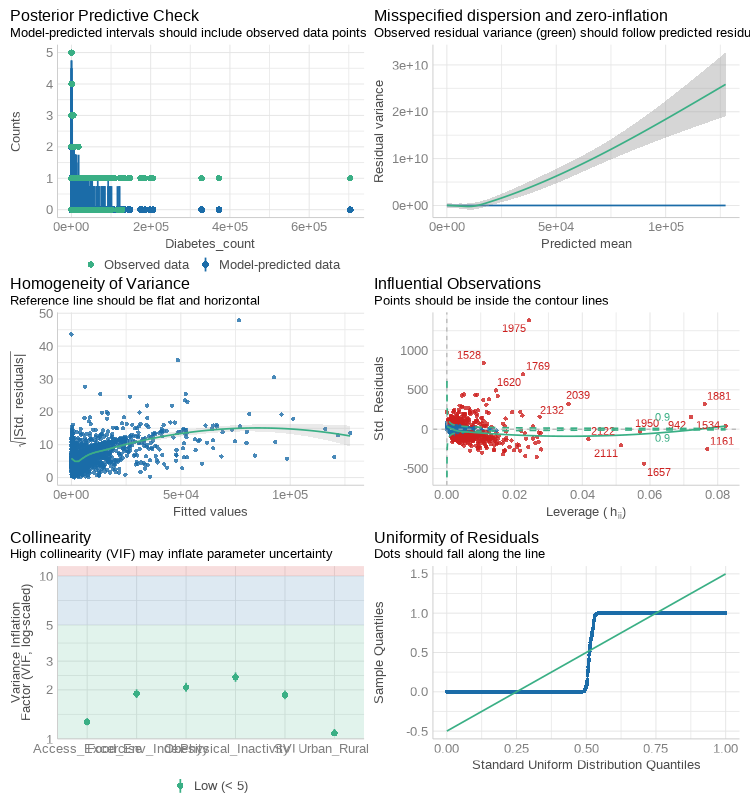

In [ ]:
%%R -w 750 -h 800 -u px
performance::check_model(fit.pois)

### Incidence Rate Ratio (IRR)

The Incidence Rate Ratio (IRR) is a measure commonly used in epidemiology and other fields to quantify the association between an exposure or predictor variable and an outcome, particularly when dealing with count data. It is often used in the context of Poisson regression models.

In Poisson regression, the exponentiated coefficients (i.e., exponentiated regression coefficients) are interpreted as Incidence Rate Ratios. Specifically, for a given predictor variable, the IRR represents the multiplicative change in the rate of the outcome for each unit change in the predictor variable.

Mathematically, if $\beta$ is the coefficient estimate of a predictor variable in a Poisson regression model, then the corresponding IRR, denoted as ( \text{IRR} ), is calculated as:

$$ \text{IRR} = e^{\beta} $$

where $e$ is the base of the natural logarithm (approximately equal to 2.718).

Interpretation of the IRR:

-   If $text{IRR} = 1$, it implies that there is no association between the predictor variable and the outcome.

-   If $\text{IRR} > 1$, it indicates that an increase in the predictor variable is associated with an increased incidence rate (or risk) of the outcome.

-   If $\text{IRR} < 1$, it suggests that an increase in the predictor variable is associated with a decreased incidence rate (or risk) of the outcome.

For example, if the IRR associated with a particular exposure is 1.5, it means that the incidence rate of the outcome is 1.5 times higher in the exposed group compared to the unexposed group, all else being equal.

The IRR provides a convenient way to quantify and interpret the strength of association between predictor variables and outcomes in Poisson regression models, particularly when dealing with count data and incidence rates.

Let's estimate the IRR value of Obesity, where it coefficient is 0.01073372 . The exponent of this value is:

In [ ]:
%%R
round(exp(0.01073372 ), 3)

[1] 1.011


In [ ]:
%%R
abs((1-exp( 0.01073372 ))*100)

[1] 1.079153


In [ ]:
%%R
model_01_IRR = tidy(fit.pois, exponentiate = TRUE,
                       conf.int = TRUE)
model_01_IRR


# A tibble: 7 × 7
  term                estimate std.error statistic p.value conf.low conf.high
  <chr>                  <dbl>     <dbl>     <dbl>   <dbl>    <dbl>     <dbl>
1 (Intercept)            0.219 0.00394       -385.       0    0.217     0.221
2 Obesity                1.01  0.0000731      147.       0    1.01      1.01 
3 Physical_Inactivity    1.02  0.0000887      278.       0    1.02      1.03 
4 Access_Excercise       1.05  0.0000193     2732.       0    1.05      1.05 
5 Food_Env_Index         1.56  0.000388      1144.       0    1.56      1.56 
6 SVI                    9.72  0.00127       1788.       0    9.70      9.75 
7 Urban_RuralUrban       4.12  0.00104       1361.       0    4.11      4.12 


### Marginal Effects and Adjusted Predictions

If we want the marginal effects for "Obesity", you may use `margins()` function of {margins} package:




In [ ]:
%%R
margins::margins(fit.pois, variables = "Obesity")

 Obesity
   83.35


`predict_response()` function of {ggeffects} calculates predicted count and  `plot()`- method automatically sets titles, axis - and legend-labels depending on the value and variable labels of the data

In [ ]:
%%R
res <- predict_response(fit.pois, terms = c("Obesity", "Urban_Rural"))
res

# Predicted counts of Diabetes_count

Urban_Rural: Rural

Obesity | Predicted |           95% CI
--------------------------------------
     15 |    906.42 |  904.05,  908.79
     20 |    956.39 |  954.29,  958.50
     25 |   1009.12 | 1007.14, 1011.11
     30 |   1064.76 | 1062.65, 1066.87
     35 |   1123.47 | 1120.95, 1125.98
     45 |   1250.77 | 1246.76, 1254.78

Urban_Rural: Urban

Obesity | Predicted |           95% CI
--------------------------------------
     15 |   3729.94 | 3721.49, 3738.41
     20 |   3935.59 | 3929.12, 3942.08
     25 |   4152.58 | 4147.85, 4157.32
     30 |   4381.53 | 4377.34, 4385.73
     35 |   4623.11 | 4617.34, 4628.89
     45 |   5146.95 | 5134.44, 5159.49

Adjusted for:
* Physical_Inactivity = 21.14
*    Access_Excercise = 61.81
*      Food_Env_Index =  7.33
*                 SVI =  0.50


Not all rows are shown in the output. Use `print(..., n = Inf)` to show
  all rows.



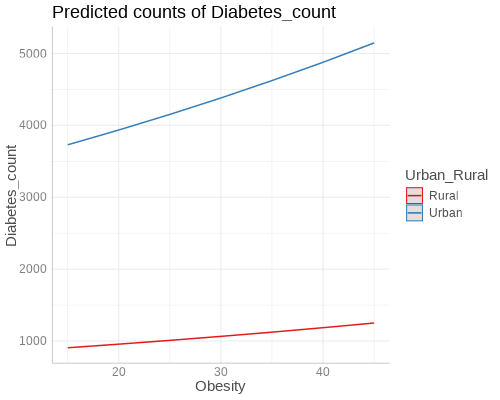

In [ ]:
%%R -w 500 -h 400 -u px
plot(res)

`effect_plot()` function of {jtools} package plot simple effects in poisson regression models:

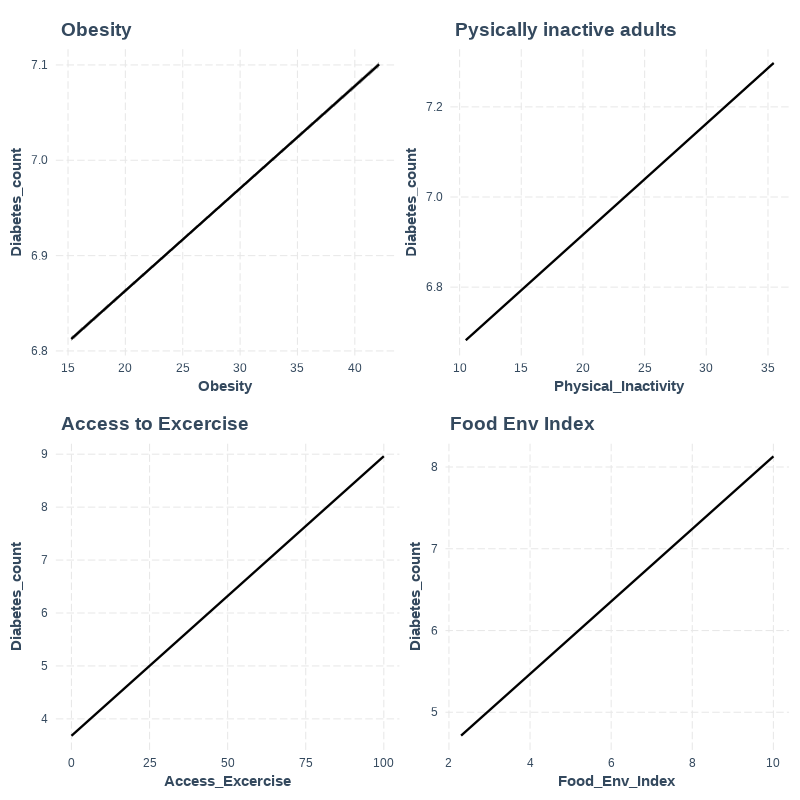

In [ ]:
%%R -w 800 -h 800 -u px
p1<-jtools::effect_plot(fit.pois,
                    main.title = "Obesity",
                    pred = Obesity,
                    interval = T,
                    outcome.scale = "link",
                    partial.residuals = F)
p2<-jtools::effect_plot(fit.pois,
                    main.title = "Pysically inactive adults ",
                    pred = Physical_Inactivity,
                    interval = TRUE,
                    outcome.scale = "link",
                    partial.residuals = F)
p3<-jtools::effect_plot(fit.pois,
                    main.title = "Access to Excercise",
                    pred = Access_Excercise ,
                    interval = TRUE,
                    outcome.scale = "link",
                    partial.residuals = F)
p4<-jtools::effect_plot(fit.pois,
                    main.title = "Food Env Index",
                    pred = Food_Env_Index,
                    interval = TRUE,
                    outcome.scale = "link",
                    partial.residuals = F)
library(patchwork)
(p1+p2)/(p3 +p4)

### Prediction Performance

The `predict()` function will be used to predict the number of diabetes patients the test counties. This will help to validate the accuracy of the these regression model.



In [ ]:
%%R
test$Pred.diabetes<-predict(fit.pois, test, type = "response")
Metrics::rmse(test$Diabetes_count, test$Pred.diabetes)
Metrics::mae(test$Diabetes_count, test$Pred.diabetes)

[1] 5872.592


## Summary and Conclusion

Poisson regression is a useful tool for modeling count data, where the response variable represents the number of occurrences of an event. It offers a simple and effective way to analyze the relationship between predictor variables and counts, especially when the event count data follow a Poisson distribution.

In R, you can fit a Poisson regression model using the glm() function. The interpretation of model coefficients is meaningful when we are interested in understanding how predictor variables influence the log of expected counts. However, if overdispersion (where variance exceeds the mean) is detected, alternative models such as Negative Binomial regression may provide better results.

The tutorial covers both the theoretical foundation of Poisson regression and practical steps to implement, evaluate, and interpret it in R, providing users with a solid framework for working with count data in various applications. \## References



## References

1.  [Tutorial: Poisson Regression in R](https://www.dataquest.io/blog/tutorial-poisson-regression-in-r/)

2.  [Chapter 4 Poisson Regression](https://bookdown.org/roback/bookdown-BeyondMLR/ch-poissonreg.html#sec-overdispPois)

3.  [Chapter 10 Poisson regression](https://bookdown.org/drki_musa/dataanalysis/poisson-regression.html)

4.  [Poisson Regression \| R Data Analysis Examples](https://stats.oarc.ucla.edu/r/dae/poisson-regression/)

5.  [Poisson Regression in R: a complete guided example](https://rpubs.com/Julian_Sampedro/1047952)

6.  [Chapter 7 Count Data Models](https://discdown.org/microeconometrics/count-data-models.html#count-data-models)


